In [7]:
import sys
sys.path.append("..")

from data_transformation.db_env import DbEnv, db

# Native libraries
import os
import math

# Essential Libraries
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [4]:
# date 당 return으로 계산

df_price = pd.read_pickle('../storage/df_price.pkl')
df_mcpi = pd.read_pickle('../storage/df_mcpi.pkl')

df_price = pd.concat([df_mcpi, df_price], axis=1)

df_price_droped = df_price.dropna(axis=0)
df_price_droped = df_price_droped.sort_index(ascending=True)
list_price_droped = list(df_price_droped.columns)

df_price_log_day0 = np.log(df_price_droped[:-1]).dropna(axis=0)
df_price_log_day1 = np.log(df_price_droped[1:]).dropna(axis=0)
df_price_log_day0.index = df_price_log_day1.index
df_price_rtn = df_price_log_day0.sub(df_price_log_day1)

df_price_rtn.to_pickle("../storage/df_price_rtn.pkl")
print(df_price_rtn)

                   0        26        27        28   29        30        31  \
date                                                                          
2021-07-07  0.001269  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
2021-07-08  0.006367  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
2021-07-09  0.003145  0.004175  0.000000  0.065241  0.0  0.000000  0.000000   
2021-07-10 -0.003731  0.004193  0.302281  0.069796  0.0  0.000000  0.000000   
2021-07-11  0.003517  0.000000  0.000000 -0.253988  0.0  0.000000  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2021-11-23  0.004765 -0.038669  0.000000  0.000000  0.0  0.090061  0.000000   
2021-11-24  0.004097  0.017392  0.000000 -0.003350  0.0  0.000000  0.001428   
2021-11-25  0.001017  0.021277  0.000000  0.003350  0.0  0.000000  0.000000   
2021-11-26  0.012240 -0.072571  0.000000 -0.045910  0.0  0.000000  0.000000   
2021-11-27 -0.004931  0.105361  0.000000  0.069680  

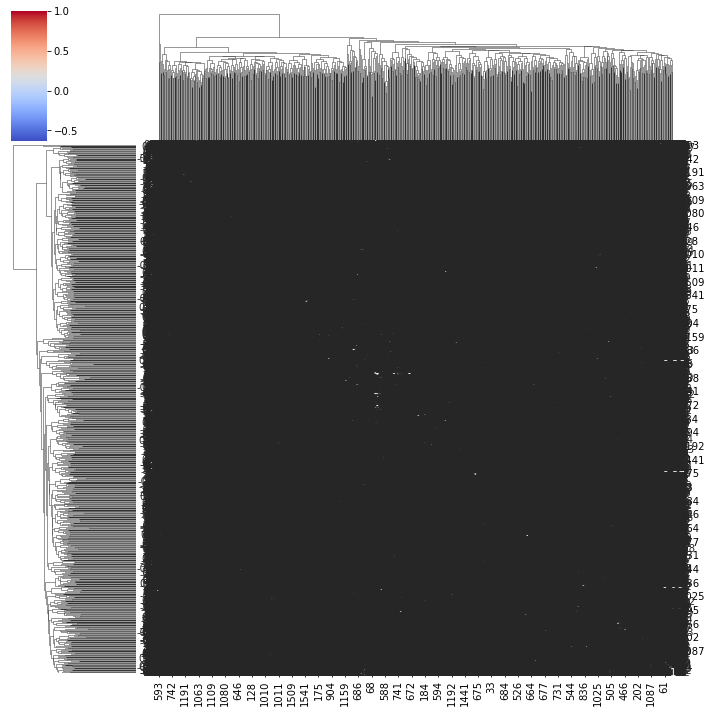

In [11]:
# 피어슨으로 수익률 correltaion

df_price_rtn = pd.read_pickle('../storage/df_price_rtn.pkl')

# 모든 값 0인 77번곡 제외
df_price_rtn = df_price_rtn[df_price_rtn.columns.difference(['77', '212', '901'])]
df_price_rtn_corr = df_price_rtn.corr(method='pearson')

sns.clustermap(df_price_rtn_corr, annot=True, cmap='coolwarm')